In [97]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno

In [98]:
#kaggle original dataset name = big_startup_sucsees_dataset.csv
startup_data = pd.read_csv('big_startup_success_dataset.csv')
startup_data.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [99]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


It looks like we have a lot of mssing locations, and founding dates we will using `missingno` how large the gaps of data missing are 

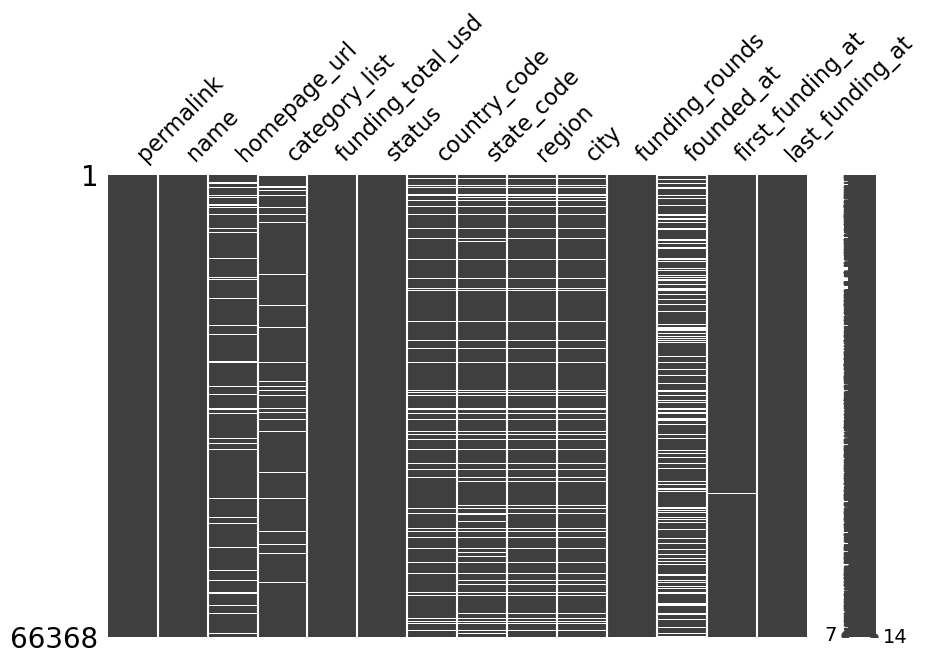

In [100]:
msno.matrix(startup_data, figsize=(10,6))
plt.show()

There are a large amount of gaps in founding date. To solve this we will use the first funding date inplace of this. For location it looks like the largest missing columns is state code which could be simply because there in a country with no state code, or just missing in general. We'll make a heat map to show how often these missing values allign together

<AxesSubplot:>

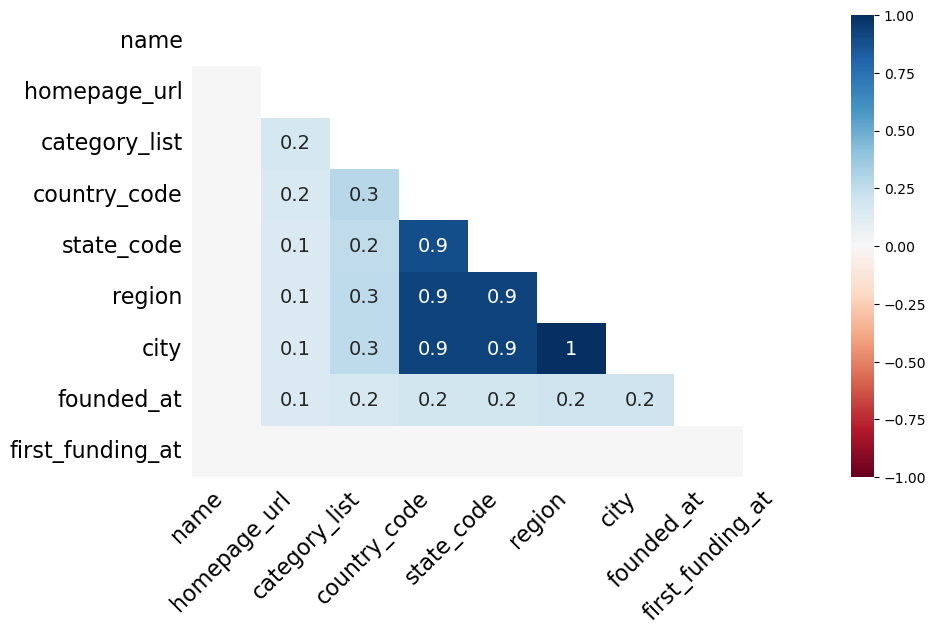

In [101]:
msno.heatmap(startup_data, figsize=(10,6))

Most of the time if they are missing a piece of location they are missing usually all other location aspects. lets just take a look and visual of how much data is missing in these columns

<AxesSubplot:>

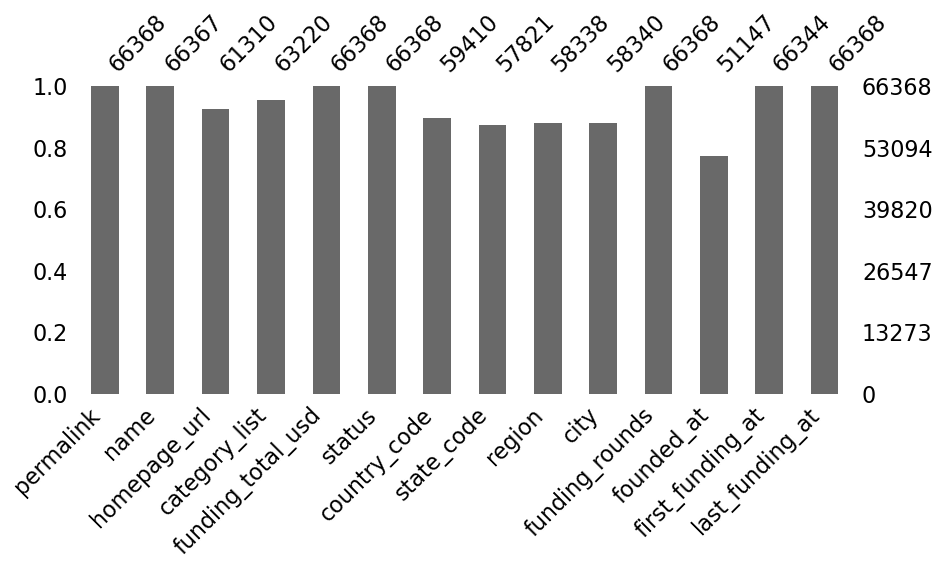

In [102]:
msno.bar(startup_data, figsize=(10,4))

for location information at worst is missing approximately 80% of the data which isn't to bad considering the size of the dataset. we can try to use geopy to if they have a least one location indicator to get the country code or city if possible. looking at `founded_at` it looks like 70% of dates are missing but again we will use there first funding date as replacement, and last funding date if no first date is found. for homepage_url since they may or may not have we will simply make it so if they have a webpage it will be indicated with a 1 and a 0 if not. as for category since it is missing less than 5% we will name those categories as 'Other'

In [103]:
startup_data.nunique(axis=0)

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

name is missing 1 value but it also appears that some startups have also may have reopened under the same name at a different time. It also looks as though some urls are also being reused by some startups. lets take a look at some companies that reuse their name.

In [104]:
startup_data[startup_data.duplicated(subset=['name'], keep=False)].head(10)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
281,/organization/3divaz-2,3DIVAZ,http://www.3divaz.ch/Home,NaN,202250.031601567,closed,NaN,NaN,NaN,NaN,1,2014-07-01,2015-11-01,2015-11-01
282,/organization/3divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,202250.031601567,operating,CHE,1,CHE - Other,Wildegg,1,2014-07-01,2015-11-01,2015-11-01
1526,/organization/adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,60000,operating,NaN,NaN,NaN,NaN,1,NaN,2015-03-21,2015-03-21
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,60000,closed,NaN,NaN,NaN,NaN,1,2014-11-15,2015-04-21,2015-04-21
1995,/organization/agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,29000000,operating,USA,CA,SF Bay Area,Palo Alto,3,2014-01-01,2014-07-01,2015-09-15
1996,/organization/agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,-,operating,USA,NY,New York City,New York,2,2013-07-01,2014-04-01,2014-12-01
3005,/organization/amicus,Amicus,http://amicushq.com,Colleges|Innovation Management|Nonprofits|Poli...,3780000,operating,USA,NY,New York City,New York,2,2011-01-01,2012-02-01,2012-11-13
3006,/organization/amicus-co,Amicus,http://www.amicus.co,Apps|Mobile|Mobile Commerce,18015,operating,IND,7,New Delhi,New Delhi,2,2015-01-01,2015-04-15,2015-04-22
3090,/organization/amplitude,Amplitude,http://amplitude.com,Analytics|Big Data|Mobile Analytics|SaaS,11000000,operating,USA,CA,SF Bay Area,San Francisco,4,2012-01-01,2012-01-01,2015-08-05
3091,/organization/amplitude-2,Amplitude,http://amplitude-technologies.com/,Electronics,39079461,operating,FRA,A8,Ã‰vry,Évry,1,2001-01-01,2012-01-25,2012-01-25


it looks like some companies have closed and reopen under the same name. some companies like the 2 Amplitudes show they have  different categories, location, and dates for funding. It is reasonable to some of these companies are different but share the same name while others have the same name and are the same company

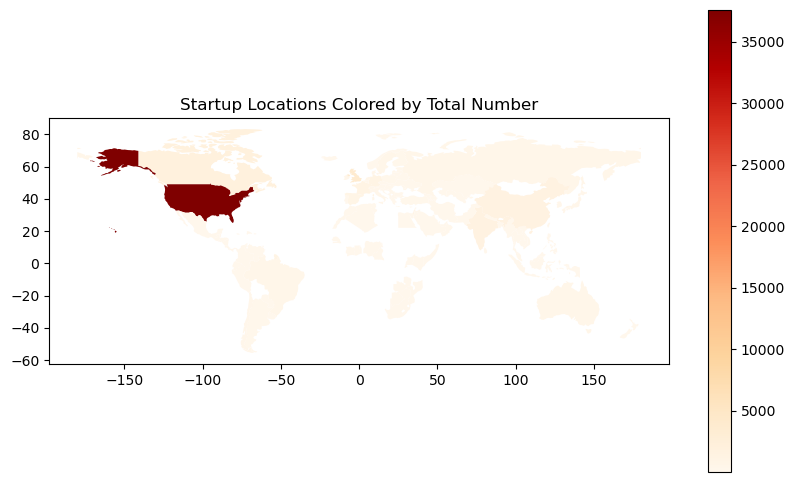

In [105]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = startup_data.groupby('country_code').size().reset_index(name='counts')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country_code')
merged.plot(column='counts', cmap='OrRd', legend=True, figsize=(10,6))
plt.title('Startup Locations Colored by Total Number')
plt.show()

So according to this graph a large marjority of these startups are located in the USA. In fact there are so many startups located in the U.S. that all other countries are shown as beneath 5000. Lets take a look at the second highest value to measure the distance between counts

In [106]:
country_counts_sorted = merged.sort_values(by='counts', ascending=False)
country_counts_sorted.head(3)
country_counts_sorted.loc[:,['name', 'continent', 'iso_a3','counts']].head(4)

,name,continent,iso_a3,counts
1,United States of America,North America,USA,37601
92,United Kingdom,Europe,GBR,3688
0,Canada,North America,CAN,1925
56,India,Asia,IND,1596


So we see that the US has over 10X the number of startups than the second, the U.K. So to visulize the number of startups globally we will remove the US.

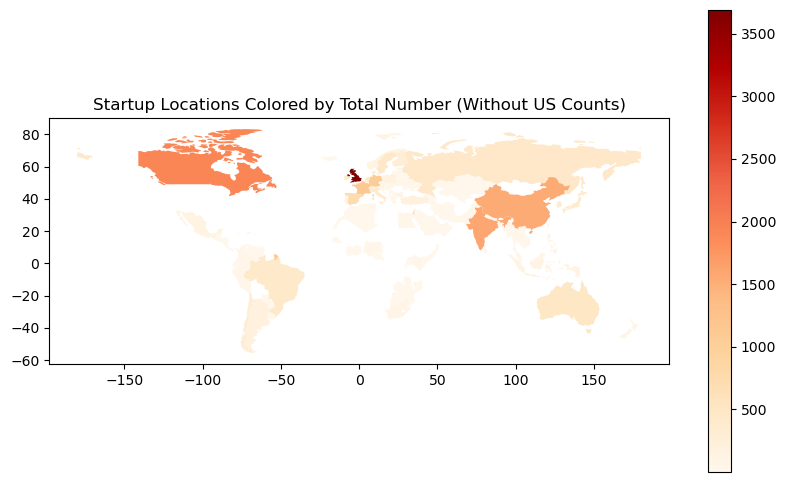

In [107]:
merged_without_us = merged.iloc[np.where(merged['country_code'] != 'USA')]
merged_without_us.plot
merged_without_us.plot(column='counts', cmap='OrRd', legend=True, figsize=(10,6))
plt.title('Startup Locations Colored by Total Number (Without US Counts)')
plt.show()

We now have a better idea on where these startups are located. As we saw the second country holding the most startups was the UK, then Canada, and parts of Asia like china, and India. So from these Geography heat maps most startups happen in North America, and parts of Europe

Lets take a look at the categories now. We will make a new dataframe and replace every nan with 'Other'

In [108]:
categories = startup_data['category_list']
categories = categories.fillna('Other')
categories.value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
Other                                                                          3148
E-Commerce                                                                     1332
Mobile                                                                         1177
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27297, dtype: int64

In [109]:
na = startup_data['category_list'].isna().sum()

So from the counts of categories it looks like there 27,297 unique categories listed in this data set. As we see that the top being software having 3995 counts vs the bottom 5 having only 1 count. It is worth nothing that a large portion of companies do not have a label for there company. Another thing worth noting is that the bottom categories can technically be part of the top 5 except other. for example the bottom list is E-commerce related just with more specifications. 

We will not do this here but a suggestion is to possibly find words related to the top 50 categories and parse through the bottom 20,000 and relate them to each other to have a more general view. for now we will just look for categories that make up more than 1% of data to create a bar chart

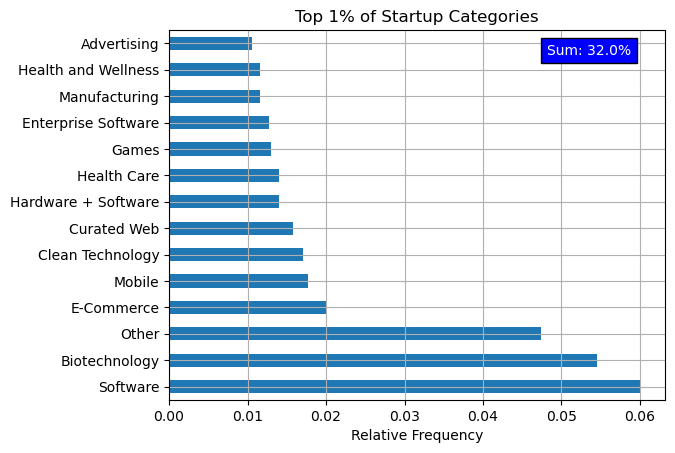

In [110]:
categories_norm = categories.value_counts(normalize=True)
top_1_percent = categories_norm[categories_norm>0.01]
top_1_percent.plot(kind='barh')
plt.title('Top 1% of Startup Categories')
plt.xlabel('Relative Frequency')
plt.grid(True)
plt.text(0.8*max(top_1_percent), len(top_1_percent)-1,f'Sum: {top_1_percent.sum().round(3)*100}%', ha='left', va='top',color='white', bbox=dict(facecolor='blue', alpha=1))
plt.show()

From this visual we see that of the top 1% of categories they make up about 32% of the data. Again it is worth noting that of 4% of companies do not have a category title. If they were labeled it may change the ordering of categories. (possible solution noted before). So we can see at least half of the top 1 percent of categories are in the tech sector.

Let's take a look at funding now for startups. Some of the data is filled with '-' so we will replace that with the mean to fix this.

In [124]:
funding_data = startup_data.copy()
funding_totals_with_values = funding_data[funding_data['funding_total_usd'] != '-'] 
mean = funding_totals_with_values['funding_total_usd'].astype(float).sum() / funding_totals_with_values.shape[0]
funding_data['funding_total_usd'] = funding_data['funding_total_usd'].replace('-', mean.round(2)).astype(float)
print(f"maximum funding: {funding_data['funding_total_usd'].max()}")
print(f"minimum funding: {funding_data['funding_total_usd'].min()}")
funding_data[startup_data['funding_total_usd'] == '-'].head(3)

maximum funding: 30079503000.0
minimum funding: 1.0


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,18478604.04,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,18478604.04,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
11,/organization/1-618-technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,18478604.04,operating,USA,FL,Orlando,Orlando,1,2013-12-07,2014-01-22,2014-01-22


While we did find the averages and filled them we can see that the maximum and minimum funding are on different ends of the spectrum in this case we use the median to check how far apart 

In [129]:
pd.options.mode.chained_assignment = None  
funding_totals_with_values.loc[:,'funding_total_usd'] = pd.to_numeric(funding_totals_with_values['funding_total_usd']).copy()
pd.options.mode.chained_assignment = 'warn'  # I just didn't want to deal with the false positive
median = np.percentile(funding_totals_with_values['funding_total_usd'], 50)
print(f'mean/median = {np.round(mean/median, decimals=2)}x')

mean/median = 9.24x


it looks like the mean is being heavliy skewed by outliers from the dataset so just for visual to pick between the values we will chart out the sorted values.

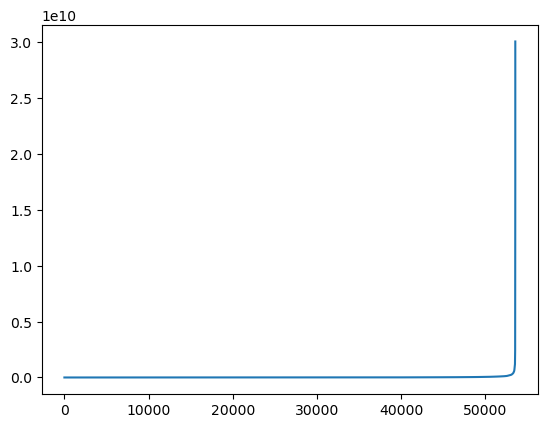

In [132]:
funding_totals = funding_totals_with_values['funding_total_usd'].sort_values()
plt.plot(range(len(funding_totals)), funding_totals)

haha okay so easy to see there is an extremely heavy left skew on the date will get rid of the outliers now and try again

In [ ]:
#TODO: get rid of the outliers in the data
percentile_75th = np.percentile(funding_totals_with_values, 75)